# Using Pandas in Python

## Pandas

Pandas is used for data maniplution and analysis. It is build on the NumPy package and provides an important data structure 'DataFrame'. The DataFrame has rows and columns, similar to a table, where the Pandas can basically read data (from sources such as a CSV file) and fill up the rows and columns. This will be easier to work with than through the use of loops and list/dictionary in Python.

In [15]:
import pandas as pd

dict = {"student": ["John", "Rosie", "Ah Hock", "Siti", "Bala"],
       "age": [18, 21, 19, 18, 20],
       "town": ["Ang Mo Kio", "Yishun", "Toa Payoh", "Clementi", "Tampines"],
       "grade": [2.4, 3.4, 2.7, 3.7, 3.2] }

class_grades = pd.DataFrame(dict)
print(class_grades)

   student  age        town  grade
0     John   18  Ang Mo Kio    2.4
1    Rosie   21      Yishun    3.4
2  Ah Hock   19   Toa Payoh    2.7
3     Siti   18    Clementi    3.7
4     Bala   20    Tampines    3.2


The index are automatically given numbers from 0 to 4. These can be changed as follows

In [16]:
class_grades.index = ["JN", "RS", "AH", "ST", "BL"]

print(class_grades)

    student  age        town  grade
JN     John   18  Ang Mo Kio    2.4
RS    Rosie   21      Yishun    3.4
AH  Ah Hock   19   Toa Payoh    2.7
ST     Siti   18    Clementi    3.7
BL     Bala   20    Tampines    3.2


Accessing the values (list of students) within the dataframe. A list of students is essentially the series or column in the DataFrame

In [17]:
class_grades['student']

JN       John
RS      Rosie
AH    Ah Hock
ST       Siti
BL       Bala
Name: student, dtype: object

Accessing via a single bracket will output a Pandas Series, while in the following example using a double bracket will output a DataFrame

In [18]:
class_grades[['student']]

,student
JN,John
RS,Rosie
AH,Ah Hock
ST,Siti
BL,Bala


To access more series, simply add in the respective series you are interested in.

In [19]:
class_grades[['student','town']]

,student,town
JN,John,Ang Mo Kio
RS,Rosie,Yishun
AH,Ah Hock,Toa Payoh
ST,Siti,Clementi
BL,Bala,Tampines


loc and iloc can also be used to perform data selection operation. 

* loc is label-based. It requires the use of row and column labels.
* iloc is integer-based. It requires the index of the row and column.

In [20]:
class_grades.loc[['JN','AH']]

,student,age,town,grade
JN,John,18,Ang Mo Kio,2.4
AH,Ah Hock,19,Toa Payoh,2.7


In [21]:
class_grades.loc[['JN','AH'],['age','grade']]

,age,grade
JN,18,2.4
AH,19,2.7


In [22]:
class_grades.iloc[[1,3]]

,student,age,town,grade
RS,Rosie,21,Yishun,3.4
ST,Siti,18,Clementi,3.7


In [23]:
class_grades.iloc[[4],[0,1,3]]

,student,age,grade
BL,Bala,20,3.2


## Exercise

Try creating a dictionary of test scores (list) using the student's name as the key. Then try to create a dataframe using the dictionary you have just created.

Print out your created dataframe

| Student | Score 1 | Score 2 | Score 3 |
|---|---|---|---|
| John | 60 | 90 | 80 |
| Juliet | 40 | 58 | 70|
| Tommy | 70 | 65 | 68 |

In [24]:
#todo: Exercise

import pandas as pd

test_dict = {'John':[60, 90, 80], 'Juliet':[40,58,70], 'Tommy':[70, 65, 68]}

df = pd.DataFrame(test_dict)

df

,John,Juliet,Tommy
0,60,40,70
1,90,58,65
2,80,70,68


-----

Depending on how you have created your dataframe, you may see the keys are listed as a column. The rows are labeled with indices starting at 0 by default.

Let's do a transpose to change the rows into columns and columns into rows.

In [25]:
df = df.T
df

,0,1,2
John,60,90,80
Juliet,40,58,70
Tommy,70,65,68


Rename the columns to something more precise

In [26]:
df.columns = ['test_1', 'test_2', 'test_3']
df

,test_1,test_2,test_3
John,60,90,80
Juliet,40,58,70
Tommy,70,65,68


Use iloc to acces the first row

In [27]:
df.iloc[0]

test_1    60
test_2    90
test_3    80
Name: John, dtype: int64

## Exercise

Try to  access the values in the first column 'Test 1'

In [28]:
#todo: Exercise

df['test_1']

#can also use the dot notation df.test_1

John      60
Juliet    40
Tommy     70
Name: test_1, dtype: int64

Limit the data of concern to only the first 2 tests.

In [29]:
#todo: Exercise

df.iloc[:,0:2]

# can select by index too
# df.iloc[[0,1,2],[0,1]]

,test_1,test_2
John,60,90
Juliet,40,58
Tommy,70,65


### Using pandas to append more data (same columns different row data)

In [30]:
#Define new dataframe
group_2_dict = {'May':[30, 45, 48], 'Jim':[77,89,80]}

df_new = pd.DataFrame(group_2_dict)
df_new = df_new.T
df_new.columns = ['test_1', 'test_2', 'test_3']
df_new

,test_1,test_2,test_3
May,30,45,48
Jim,77,89,80


In [31]:
df_all = pd.concat([df, df_new])
df_all

,test_1,test_2,test_3
John,60,90,80
Juliet,40,58,70
Tommy,70,65,68
May,30,45,48
Jim,77,89,80


##### Note: we are not using default indexes in this case but using concat can cause duplicate indexes.

A simplefix would be to use
```df_new=df_new.reset_index (drop=True)```

Otherwise, we can use the `ignore_index` option in the `pd.concat()` function:
```df_new= pd.concat([ ... ] , ignore_index=True)```

If the columns do not correspond between the dataframes, new columns will be created. The values filled will be NaN for data rows that originally do not have the new columns.

### Using combine_first

The method ```combine_first()``` can be used to fill null values in one dataframe with non-null values from another dataframe.

The resulting dataframe contains the ‘first’ dataframe values and overrides the second one values where both first.loc[index, col] and second.loc[index, col] are not missing values, upon calling first.combine_first(second)

In [32]:
group_3_dict = {'May':[30, 45, 48, 60], 'Jim':[77,89,80, 70], 'Sean':[55,57,56,45]}

df_3 = pd.DataFrame(group_3_dict)
df_3 = df_3.T
df_3.columns = ['test_1', 'test_2', 'test_3', 'test_4']
df_3

,test_1,test_2,test_3,test_4
May,30,45,48,60
Jim,77,89,80,70
Sean,55,57,56,45


In [33]:
df_4 = df_3.combine_first(df_all)
df_4

,test_1,test_2,test_3,test_4
Jim,77,89,80,70.0
John,60,90,80,NaN
Juliet,40,58,70,NaN
May,30,45,48,60.0
Sean,55,57,56,45.0
Tommy,70,65,68,NaN


### Joining data using merge

Columns from two dataframes can be joined using the ```merge()``` function. This is similar to the SQL 'join' functionality with merge method of 

* left    (Use keys from left frame only)
* right   (Use keys from right frame only)
* outer   (Use union of keys from both frames)
* inner   (Use intersection of keys from both frames)



In [34]:
df_3

,test_1,test_2,test_3,test_4
May,30,45,48,60
Jim,77,89,80,70
Sean,55,57,56,45


In [35]:
group_4_dict = {'May':[60, 45, "2A"], 'Jeremy':[80, 70, "2B"], 'Sean':[45, 45, "2B"], 'Kim':[67, 77, "2A"]}

df_4 = pd.DataFrame(group_4_dict)
df_4 = df_4.T
df_4.columns = ['test_4', 'test_5', 'class']
df_4

,test_4,test_5,class
May,60,45,2A
Jeremy,80,70,2B
Sean,45,45,2B
Kim,67,77,2A


In [36]:
cols_to_use = df_4.columns.difference(df_3.columns)
# common_cols = df_3.columns.intersection(df_all.columns)

#Extract only record of student that appear on both dataframe
df_inner = pd.merge(df_3, df_4[cols_to_use], how='inner', left_index=True, right_index=True)
df_inner

,test_1,test_2,test_3,test_4,class,test_5
May,30,45,48,60,2A,45
Sean,55,57,56,45,2B,45


In [37]:
cols_to_use = df_4.columns.difference(df_3.columns)

#Extract all possible students that appear on both dataframe, unavailable data is filled witn NaN
df_outer = pd.merge(df_3, df_4[cols_to_use], how='outer', left_index=True, right_index=True)
df_outer

,test_1,test_2,test_3,test_4,class,test_5
Jeremy,NaN,NaN,NaN,NaN,2B,70
Jim,77.0,89.0,80.0,70.0,NaN,NaN
Kim,NaN,NaN,NaN,NaN,2A,77
May,30.0,45.0,48.0,60.0,2A,45
Sean,55.0,57.0,56.0,45.0,2B,45


##### NaN stands for Not a Number. It is case-sensitive

#### Creating a new column 'average'

Let us add a new row to ```df_inner``` first.

In [38]:
import numpy as np

df_row = pd.DataFrame({'test_1':[np.NaN], 'test_2':[np.NaN], 'test_3':[np.NaN], 
                       'test_4':[np.NaN], 'test_5':[80]}, 
                      index=['Nurul'])

df_5 = pd.concat([df_inner, df_row])
df_5


,test_1,test_2,test_3,test_4,class,test_5
May,30.0,45.0,48.0,60.0,2A,45
Sean,55.0,57.0,56.0,45.0,2B,45
Nurul,NaN,NaN,NaN,NaN,NaN,80


In [39]:
df_5['average'] = df_5[['test_1', 'test_2', 'test_3', 'test_4', 'test_5']].mean(axis=1, skipna=True)
df_5

,test_1,test_2,test_3,test_4,class,test_5,average
May,30.0,45.0,48.0,60.0,2A,45,45.6
Sean,55.0,57.0,56.0,45.0,2B,45,51.6
Nurul,NaN,NaN,NaN,NaN,NaN,80,80.0


#### Delete a Column

In [40]:
del df_5['class']
df_5

,test_1,test_2,test_3,test_4,test_5,average
May,30.0,45.0,48.0,60.0,45,45.6
Sean,55.0,57.0,56.0,45.0,45,51.6
Nurul,NaN,NaN,NaN,NaN,80,80.0


#### Dropping Columns

For a litte more flexiblity to remove columns, you can use ```drop()```. To drop without reassigning, you can pass ```inplace=True```

df.drop('column_name', axis=1, inplace=True)

In [41]:
#drop the first 2 columns
#
#df_6 = df_5.drop(columns=['test_1','test_2']) 
df_6 = df_5.drop(df_5.columns[[0, 1]], axis=1) 
df_6

,test_3,test_4,test_5,average
May,48.0,60.0,45,45.6
Sean,56.0,45.0,45,51.6
Nurul,NaN,NaN,80,80.0


 Notice df_5 still have the 'test_1' and 'test_2' values

In [42]:
# notice df_5 still have the 'test_1' and 'test_2' values
df_5

,test_1,test_2,test_3,test_4,test_5,average
May,30.0,45.0,48.0,60.0,45,45.6
Sean,55.0,57.0,56.0,45.0,45,51.6
Nurul,NaN,NaN,NaN,NaN,80,80.0


### Reading data from csv files 

Pandas made it easier to read in data from a number of files formats. The HDB median resale prices are publicly available from data.gov.sg. https://data.gov.sg/dataset/median-resale-prices-for-registered-applications-by-town-and-flat-type?resource_id=a5ddfc4d-0e43-4bfe-8f51-e504e1365e27

Explore using the square brackets to access specific rows via Pandas DataFrame.

\[Starting index: Stop index]

In [43]:
import pandas as pd

resalePrices = pd.read_csv('HDB media resale prices.csv')

resalePrices[2:4]

,quarter,town,flat_type,price
2,2007-Q2,Ang Mo Kio,3-room,172000
3,2007-Q2,Ang Mo Kio,4-room,260000


To understand a little more about the data being read, some data clean up will be done to extract transactions with valid prices.

In [44]:
#select records that do not have "NA" or "-" as the price
df = resalePrices[(resalePrices.price.str.lower() != "na") & (resalePrices.price.str.lower() != "-") ].copy()

#you can use df.isnull().sum() to check the number of NaN values. However the next line simply drops the records with NaN price
df = df.dropna()

#reset the index of the dataframe
df = df.reset_index(drop=True)

#changes the price to a numeric value
df.price = pd.to_numeric(df.price)

#changes the town name to all uppercase
df.town= df.town.str.upper()
df.town= df.town.replace(['CENTRAL AREA'], 'CENTRAL')

#changes the town name to all uppercase
df.flat_type= df.flat_type.str.lower()
#change all "exec" to "executive"
df.flat_type= df.flat_type.replace(['exec'],'executive')

#Display statistics for the data
df.describe(include='all')

,quarter,town,flat_type,price
count,3580,3580,3580,3580.000000
unique,51,25,5,NaN
top,2009-Q3,JURONG WEST,4-room,NaN
freq,85,204,1187,NaN
mean,NaN,NaN,NaN,431292.835196
std,NaN,NaN,NaN,131718.475579
min,NaN,NaN,NaN,136000.000000
25%,NaN,NaN,NaN,332000.000000
50%,NaN,NaN,NaN,415950.000000
75%,NaN,NaN,NaN,515000.000000


In [70]:
df.groupby(["flat_type"]).mean().price.map(lambda x: f"${x/1000:.1f}K")

flat_type
2-room       $170.8K
3-room       $298.3K
4-room       $427.9K
5-room       $507.1K
executive    $544.5K
Name: price, dtype: object

#### More about Matplotlib

Matplotlib is a power plotting library that can help to visualize our data. In this section
* the number of flat transacted per flat type is displayed in a bar plot
* the prices are grouped into the different quarters and the mean is displayed in a line plot.

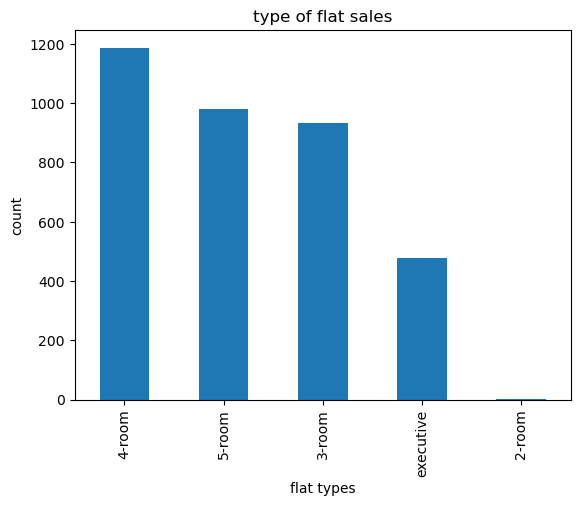

In [58]:
import matplotlib.pyplot as plt

df['flat_type'].value_counts().plot(kind='bar')
plt.title('type of flat sales')
plt.xlabel('flat types')
plt.ylabel('count')
plt.show()

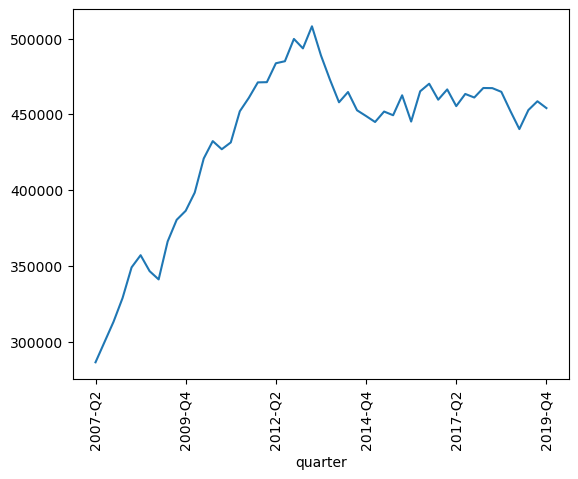

In [59]:
avg_price = df.groupby('quarter')['price'].agg('mean')
avg_price.plot()
plt.xticks(rotation='vertical')
plt.show()

## Example

1. Load the csv file (number-of-rain-days.csv) containing details on the number of rainy days in a month

In [61]:
r1 = pd.read_csv('number-of-rain-days.csv')
r1

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10
...,...,...
486,2022-07,16
487,2022-08,15
488,2022-09,14
489,2022-10,27


2. Determine if there is any missing values in the data

In [62]:
r1.isnull().sum()

month               0
no_of_rainy_days    0
dtype: int64

3. Select only records from 2019-01 till now

In [65]:
rf = r1[r1.month >= "2020-01"].copy()
rf

,month,no_of_rainy_days
456,2020-01,6
457,2020-02,8
458,2020-03,8
459,2020-04,12
460,2020-05,16
461,2020-06,21
462,2020-07,22
463,2020-08,12
464,2020-09,18
465,2020-10,16


4. Display the extracted records as a line graph and set the x label to be month

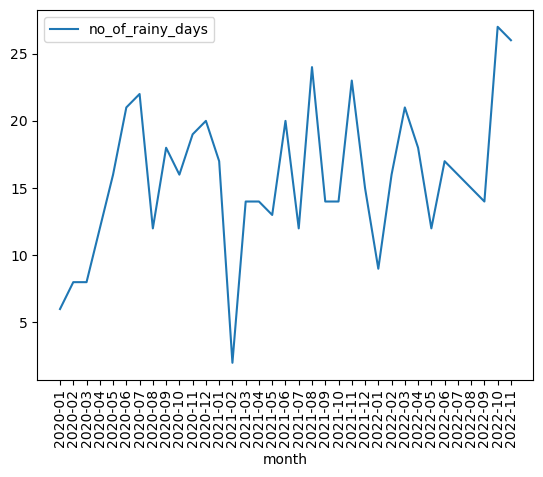

In [66]:
fig, ax = plt.subplots()

rf.plot(ax=ax, xticks=rf.index)
ax.set_xticklabels(rf.month)
plt.xlabel('month')
plt.xticks(rotation='vertical')
plt.show()

# Debugging in Python

Trying to figure out what is wrong with the code or trying to understand how the code works is an important skill. To debug in Jupyter notebook, you use Python's own pdb module

In [71]:
def bad_function(var):
    return var + 0
bad_function("input")

TypeError: can only concatenate str (not "int") to str

The above error indicates a string cannot be concatenated with an integer.
For Python 3.7, use the breakpoint() to debug the code.

* a(rgs) - print the args of the current function (f(args))
* l(ist) - show where in the source code that the next line to execute is 
* w(here) – Print the stack trace
* d(own) – Move the current frame X number of levels down. Defaults to one.
* u(p) – Move the current frame X number of levels up. Defaults to one.
* b(reak) – With a *lineno* argument, set a break point at that line number in the current file / context
* **c(ontinue)** – Continue execution, only stop when a breakpoint is reached
* **n(ext)** - Execute the next line in the current function is reached, or it returns
* **s(tep)** - Execute the current line, stop at te first possible occasion (either in a function that is called or on the next line in the current function
* r(eturn) - Continue until the current functino returns
* **q(uit)** - Exit from the debugging session
* ? - all documented commands

The difference between next and step is that step stops inside a called function, while next executes called functions at (nearly) full speed, only stopping at the next line in the current function.

**Toggle the bug icon** at the top right to enable debugging.

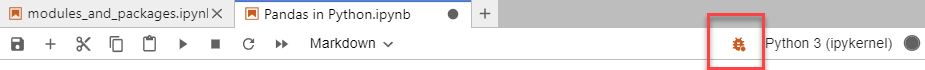

In [72]:
def bad_function(var):
    breakpoint()
    return var + 0
bad_function("input")

--Return--
None
> c:\users\clee1\appdata\local\temp\ipykernel_18840\1136090361.py(5)override_sys_breakpoint()



ipdb>  n


> c:\users\clee1\appdata\local\temp\ipykernel_18840\2977708367.py(3)bad_function()
      1 def bad_function(var):
      2     breakpoint()
----> 3     return var + 0
      4 bad_function("input")



ipdb>  a


var = 'input'


ipdb>  w


    [... skipping 21 hidden frame(s)]

  c:\users\clee1\appdata\local\temp\ipykernel_18840\2977708367.py(4)<module>()
      1 def bad_function(var):
      2     breakpoint()
      3     return var + 0
----> 4 bad_function("input")

> c:\users\clee1\appdata\local\temp\ipykernel_18840\2977708367.py(3)bad_function()
      1 def bad_function(var):
      2     breakpoint()
----> 3     return var + 0
      4 bad_function("input")



ipdb>  q


### JupyterLab debugger front-end
Notebooks, code consoles and files can be debugged from JupyterLab directly. Similarly, toggle the bug icon at the top right to enable debugging.

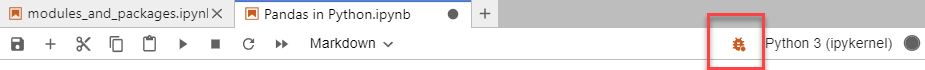

This is only available for kernel that support debugging.

Once debugging is enabled, set the breakpoints where we would be stepping into the code. This can be done by clicking on the gutter on the line we wish to add a breakpoint.

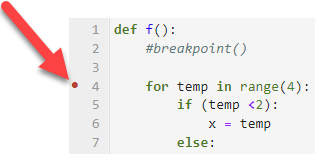

Run the cell/code and the execution should stop at the set breakpoint.

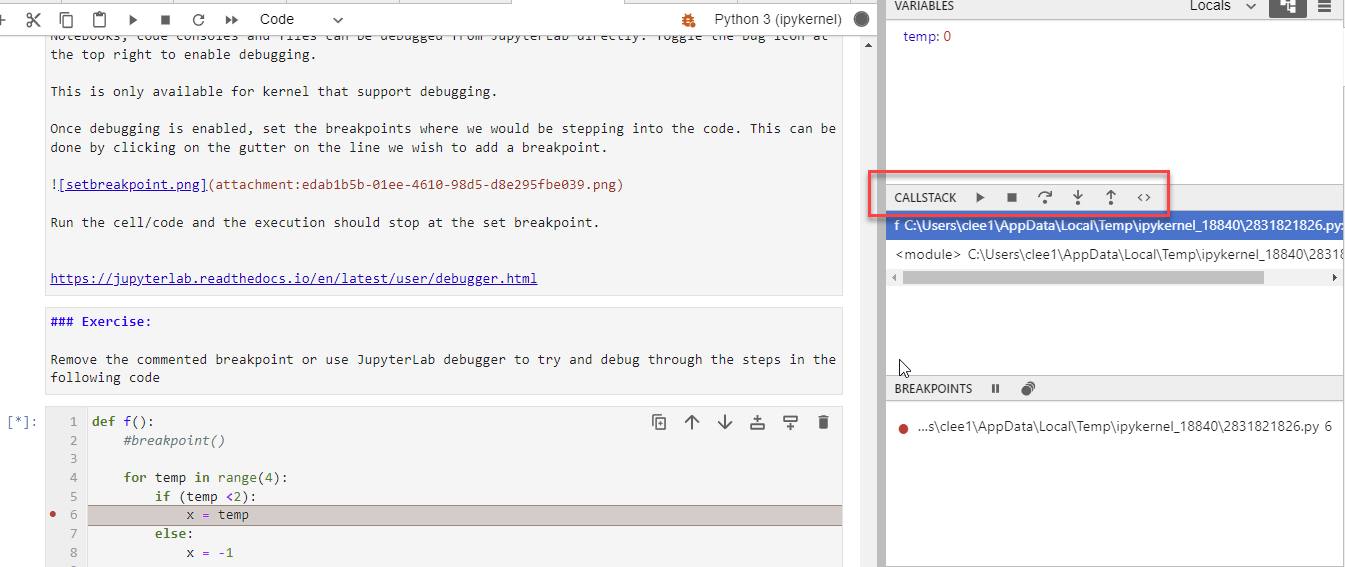

The debugger allows you to observe the variables and also debug actions such as Next (line) and Continue in the Callstack to execute code at your control.

https://jupyterlab.readthedocs.io/en/latest/user/debugger.html

### Exercise: 
    
Remove the commented breakpoint or use JupyterLab debugger to try and debug through the steps in the following code 

In [ ]:
def f():
    #breakpoint()

    for temp in range(4):
        if (temp <2):
            x = temp
        else:
            x = -1
            
x = 0
f()

Code development and data analysis always require a bit of trial and error, and IPython contains tools to streamline this process.
This section will briefly cover some options for controlling Python's exception reporting, followed by exploring tools for debugging errors in code.

## Controlling Exceptions: ``%xmode``

Most of the time when a Python script fails, it will raise an Exception.
When the interpreter hits one of these exceptions, information about the cause of the error can be found in the *traceback*, which can be accessed from within Python.
With the ``%xmode`` magic function, IPython allows you to control the amount of information printed when the exception is raised.
Consider the following code:

In [73]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [74]:
func2(1)

ZeroDivisionError: division by zero

Calling ``func2`` results in an error, and reading the printed trace lets us see exactly what happened.
By default, this trace includes several lines showing the context of each step that led to the error.
Using the ``%xmode`` magic function (short for *Exception mode*), we can change what information is printed.

``%xmode`` takes a single argument, the mode, and there are three possibilities: ``Plain``, ``Context``, and ``Verbose``.
The default is ``Context``, and gives output like that just shown before.
``Plain`` is more compact and gives less information:

In [75]:
%xmode Plain

Exception reporting mode: Plain


In [76]:
func2(1)

ZeroDivisionError: division by zero

The ``Verbose`` mode adds some extra information, including the arguments to any functions that are called:

In [77]:
%xmode Verbose

Exception reporting mode: Verbose


In [78]:
func2(1)

ZeroDivisionError: division by zero

This extra information can help narrow-in on why the exception is being raised.
So why not use the ``Verbose`` mode all the time?
As code gets complicated, this kind of traceback can get extremely long.
Depending on the context, sometimes the brevity of ``Default`` mode is easier to work with.